In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

## Part I

In [114]:
data = sklearn.datasets.fetch_california_housing()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['Target'] = data['target']
 

In [115]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

In [116]:
# Normalize continuous variables using MinMaxScaler from sklearn.
sklearn.preprocessing.MinMaxScaler(df)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [120]:
# Simulate a categorical variable by categorizing the ‘HouseAge’ column.

age_bins = [0, 10, 30, 60] 
age_labels = ['Age_cat_new', 'Age_cat_old', 'Age_cat_very Old']
df['HouseAgeCategory'] = pd.cut(df['HouseAge'], bins=age_bins, labels=age_labels, right=False)
df = pd.get_dummies(df, columns=['HouseAgeCategory'], prefix='', prefix_sep='')
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target,"(Age_cat_new, Age_cat_old, Age_cat_very Old)",Age_cat_new,Age_cat_old,Age_cat_very Old
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,Age_cat_very Old,False,False,True
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,Age_cat_old,False,True,False
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,Age_cat_very Old,False,False,True
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,Age_cat_very Old,False,False,True
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,Age_cat_very Old,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,Age_cat_old,False,True,False
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,Age_cat_old,False,True,False
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,Age_cat_old,False,True,False
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,Age_cat_old,False,True,False


[Text(0, 0, 'MedInc'),
 Text(0, 1, 'HouseAge'),
 Text(0, 2, 'AveRooms'),
 Text(0, 3, 'AveBedrms'),
 Text(0, 4, 'Population'),
 Text(0, 5, 'AveOccup'),
 Text(0, 6, 'Latitude'),
 Text(0, 7, 'Longitude'),
 Text(0, 8, 'Target'),
 Text(0, 9, 'Age_cat_new'),
 Text(0, 10, 'Age_cat_old'),
 Text(0, 11, 'Age_cat_very Old')]

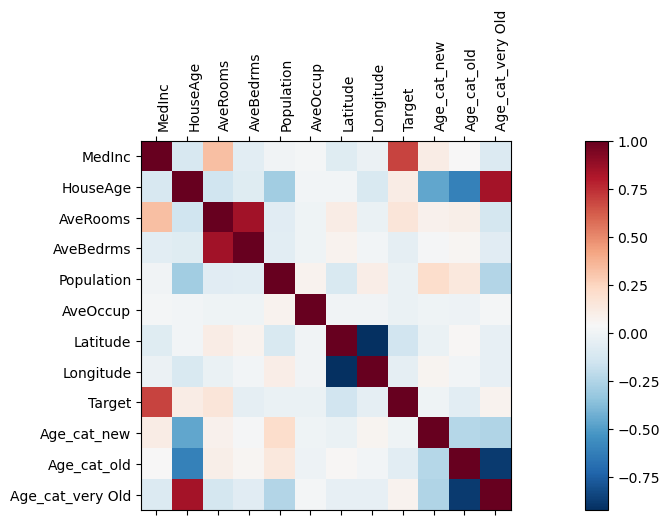

In [100]:
# Simulate a categorical variable by categorizing the ‘HouseAge’ column.
fig, (ax1, cbar_ax) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [0.95, 0.05]})
matshow = ax1.matshow(df.corr(), cmap='RdBu_r')
cbar = plt.colorbar(matshow, cax=cbar_ax)
ax1.set_xticks(range(len(df.columns)))
ax1.set_yticks(range(len(df.columns)))
ax1.set_xticklabels(df.columns, rotation=90, ha='left')
ax1.set_yticklabels(df.columns)

In [101]:
# Create a new feature derived from existing columns.
df['MadInc_AveRooms'] = df['MedInc'] / df['AveRooms']
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target,Age_cat_new,Age_cat_old,Age_cat_very Old,MadInc_AveRooms
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,False,False,True,1.192017
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,False,True,False,1.330750
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,False,False,True,0.875637
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,False,False,True,0.970046
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,False,False,True,0.612272
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,False,True,False,0.309249
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,False,True,False,0.418185
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,False,True,False,0.326575
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,False,True,False,0.350351


## Part II

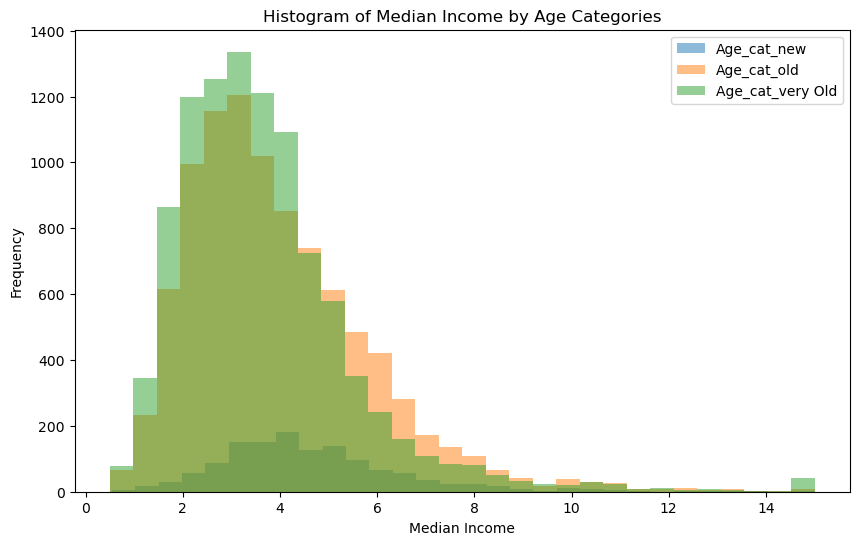

In [128]:
# Use matplotlib to plot a histogram that compares property age with its median value.
plt.figure(figsize=(10, 6))
for age_cat in age_labels:
    plt.hist(df[df[age_cat] == 1]['MedInc'], alpha=0.5, label=age_cat, bins=30)
    
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.title('Histogram of Median Income by Age Categories')
plt.legend()



## Part III

In [143]:
income_bins = [0, 2, 4, 6, 8, 10, 12, 14, 16]
income_labels = ['0-2','2-4','4-6','6-8', '8-10', '10-12', '12-14', '14+']

df['IncomeCategory'] = pd.cut(df['MedInc'], bins=income_bins, labels=income_labels, right=False)
average_target_by_income_category = df.groupby('IncomeCategory')['Target'].mean()




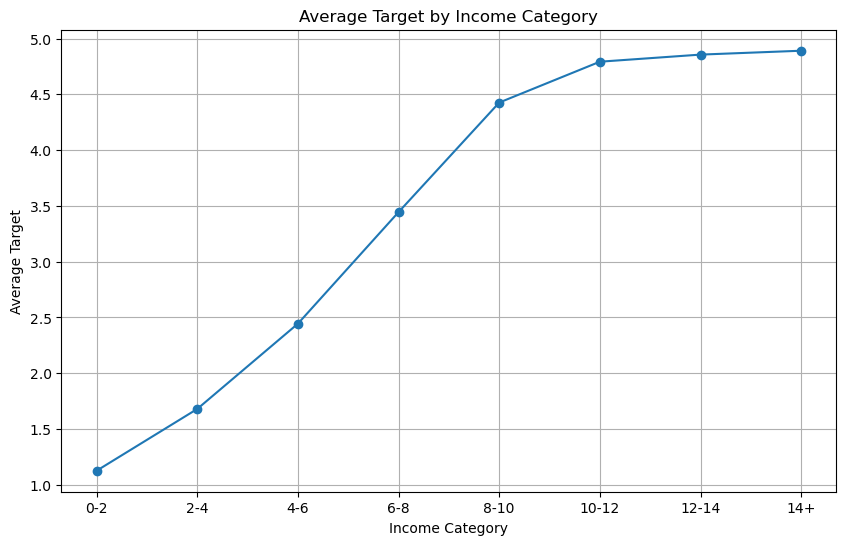

In [147]:
# Plotting
plt.figure(figsize=(10, 6))
average_target_by_income_category.plot(kind='line', marker='o')
plt.title('Average Target by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Average Target')
plt.grid(True)